<a href="https://colab.research.google.com/github/TasneemAhmed/Finance-Data-Analysis/blob/main/Finance_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1. Importing Packages**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns 
import plotly.express as px
import matplotlib.pyplot as plt

In [47]:
#for hypothesis testing
import scipy.stats as ss 

# **2. Read data & drop unneeded columns & Show box plot for different columns**

In [2]:
#specify need only the second sheet
df = pd.read_excel('/content/sample_data/Bank_Personal_Loan_Modelling.xlsx', sheet_name=1)
df

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,29,3,40,92697,1,1.9,3,0,0,0,0,1,0
4996,4997,30,4,15,92037,4,0.4,1,85,0,0,0,1,0
4997,4998,63,39,24,93023,2,0.3,3,0,0,0,0,0,0
4998,4999,65,40,49,90034,3,0.5,2,0,0,0,0,1,0


In [3]:
#check if there is null values in columns 
df.isnull().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

In [4]:
#drop unneeded columns: ID, ZIP Code
df.drop(['ID', 'ZIP Code'], axis=1, inplace=True)

In [5]:
df.columns

Index(['Age', 'Experience', 'Income', 'Family', 'CCAvg', 'Education',
       'Mortgage', 'Personal Loan', 'Securities Account', 'CD Account',
       'Online', 'CreditCard'],
      dtype='object')

# **3. Detecting Outlires**

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f5d949bd2d0>,
      dtype=object)

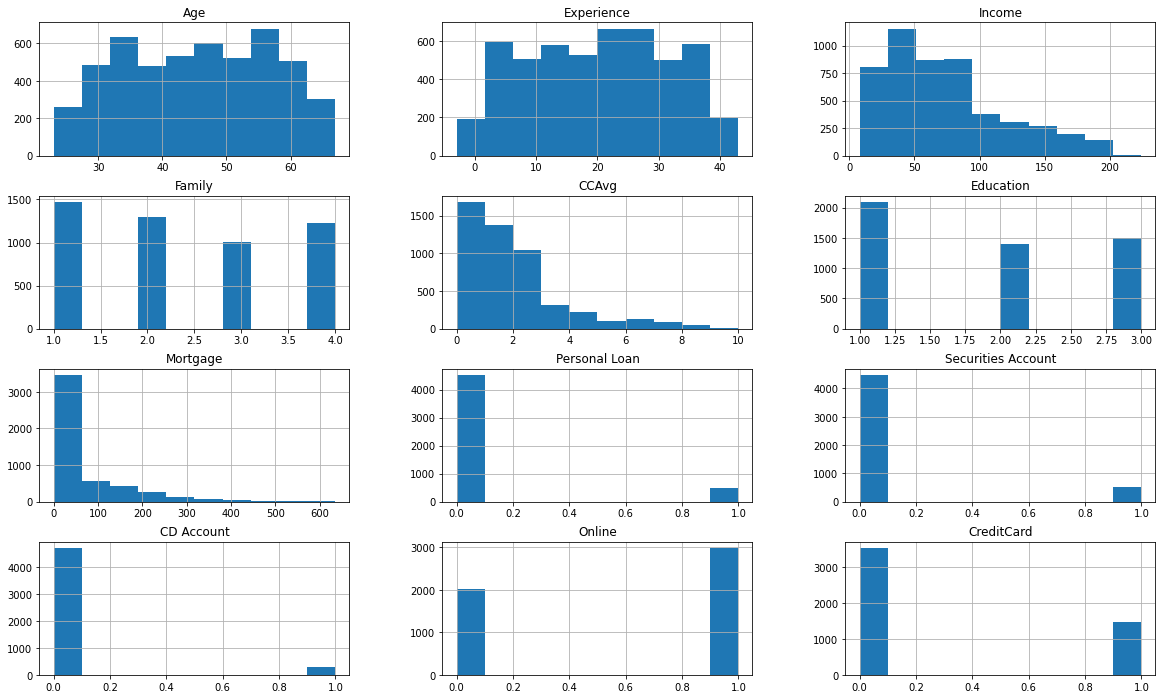

In [6]:
df.hist(figsize=(20,12))

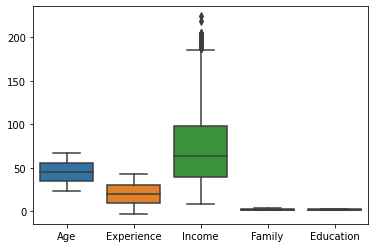

In [7]:
sns.boxplot(data=df[['Age', 'Experience', 'Income', 'Family','Education']])

In [8]:
columns = ['Age', 'Experience', 'Income', 'Family']
for col in columns:
  fig = px.box(data_frame=df, y=col, title='5 Numbers Summary according to {} using box plot'.format(col))
  fig.show()

**Skewness**

skewness is a measure of asymmetry of the probability distribution about its mean and helps describe the shape of the probability distribution.

- Positive – observed when the distribution has a thicker right tail and  mode<median<mean.
- Negative – observed when the distribution has a thicker left tail and mode>median>mean.
- Zero (or nearly zero) – observed when the distribution is symmetric about its mean and approximately mode=median=mean.

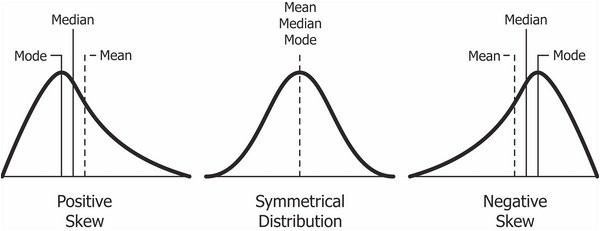

In [9]:
df.skew()

Age                  -0.029341
Experience           -0.026325
Income                0.841339
Family                0.155221
CCAvg                 1.598457
Education             0.227093
Mortgage              2.104002
Personal Loan         2.743607
Securities Account    2.588268
CD Account            3.691714
Online               -0.394785
CreditCard            0.904589
dtype: float64

**3.1 Detecting & Solving negtive numbers in Experience column**

In [10]:
px.box(df, y='Experience')

In [11]:
df['Experience'].mean()

20.1046

In [12]:
negtive_exp = df[df['Experience']<0]
negtive_exp

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
89,25,-1,113,4,2.300000,3,0,0,0,0,0,1
226,24,-1,39,2,1.700000,2,0,0,0,0,0,0
315,24,-2,51,3,0.300000,3,0,0,0,0,1,0
451,28,-2,48,2,1.750000,3,89,0,0,0,1,0
524,24,-1,75,4,0.200000,1,0,0,0,0,1,0
536,25,-1,43,3,2.400000,2,176,0,0,0,1,0
540,25,-1,109,4,2.300000,3,314,0,0,0,1,0
576,25,-1,48,3,0.300000,3,0,0,0,0,0,1
583,24,-1,38,2,1.700000,2,0,0,0,0,1,0
597,24,-2,125,2,7.200000,1,0,0,1,0,0,1


In [13]:
#the insight how range of age 23 To 29 Years has no experience so it's Outlier
px.box(negtive_exp, y='Age')

In [14]:
negtive_exp.size

624

In [15]:
print('There are {} records with negtive experience and aprox {}% of all data'.format(negtive_exp.size, ((negtive_exp.size/df.size)*100)))

There are 624 records with negtive experience and aprox 1.04% of all data


In [16]:
#replace negtive values with positive
df['Experience'] =  np.where(df['Experience']<0, df['Experience']*-1, df['Experience'])

In [17]:
#checking there are no negtive experience
df[df['Experience']<0]

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard


**3.2 Detecting & Solving the ouliers in Income column**

In [18]:
px.box(data_frame=df, y='Income')

In [19]:
Q1 = np.percentile(df['Income'], 25,
                   interpolation = 'midpoint')
 
Q3 = np.percentile(df['Income'], 75,
                   interpolation = 'midpoint')
IQR = Q3 - Q1
IQR

59.0

In [20]:
upper = Q3 + 1.5*IQR
upper

186.5

In [21]:
df[df['Income']>upper]

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
18,46,21,193,2,8.100000,3,0,1,0,0,0,0
47,37,12,194,4,0.200000,3,211,1,1,1,1,1
53,50,26,190,3,2.100000,3,240,1,0,0,1,0
59,31,5,188,2,4.500000,1,455,0,0,0,0,0
303,49,25,195,4,3.000000,1,617,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
4659,28,4,199,1,6.333333,1,0,0,0,0,0,0
4670,52,26,194,1,1.700000,1,0,0,0,0,1,0
4895,45,20,201,2,2.800000,1,0,0,0,0,1,1
4981,34,9,195,2,3.000000,1,122,0,0,0,1,0


In [22]:
#replace the upper outlier with Q3 + 1.5*IQR
df['Income'] = np.where(df['Income']>upper, upper, df['Income'])

In [23]:
#check there is no upper outlier 
df[df['Income']>upper]

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard


In [24]:
px.box(df, y='Income')

# **4. Show correlations between features**
- Positive value: positive correlation
- Negative value: negative correlation
- Zero value: no correlation

In [25]:
df.corr()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
Age,1.000000,0.993991,-0.054988,-0.046418,-0.052030,0.041334,-0.012539,-0.007726,-0.000436,0.008043,0.013702,0.007681
Experience,0.993991,1.000000,-0.046571,-0.051851,-0.049750,0.013919,-0.011097,-0.008304,-0.000989,0.009735,0.014051,0.008851
Income,-0.054988,-0.046571,1.000000,-0.157593,0.644574,-0.187403,0.206709,0.504559,-0.002549,0.170194,0.014099,-0.002474
Family,-0.046418,-0.051851,-0.157593,1.000000,-0.109285,0.064929,-0.020445,0.061367,0.019994,0.014110,0.010354,0.011588
CCAvg,-0.052030,-0.049750,0.644574,-0.109285,1.000000,-0.136138,0.109909,0.366891,0.015087,0.136537,-0.003620,-0.006686
Education,0.041334,0.013919,-0.187403,0.064929,-0.136138,1.000000,-0.033327,0.136722,-0.010812,0.013934,-0.015004,-0.011014
Mortgage,-0.012539,-0.011097,0.206709,-0.020445,0.109909,-0.033327,1.000000,0.142095,-0.005411,0.089311,-0.005995,-0.007231
Personal Loan,-0.007726,-0.008304,0.504559,0.061367,0.366891,0.136722,0.142095,1.000000,0.021954,0.316355,0.006278,0.002802
Securities Account,-0.000436,-0.000989,-0.002549,0.019994,0.015087,-0.010812,-0.005411,0.021954,1.000000,0.317034,0.012627,-0.015028
CD Account,0.008043,0.009735,0.170194,0.014110,0.136537,0.013934,0.089311,0.316355,0.317034,1.000000,0.175880,0.278644


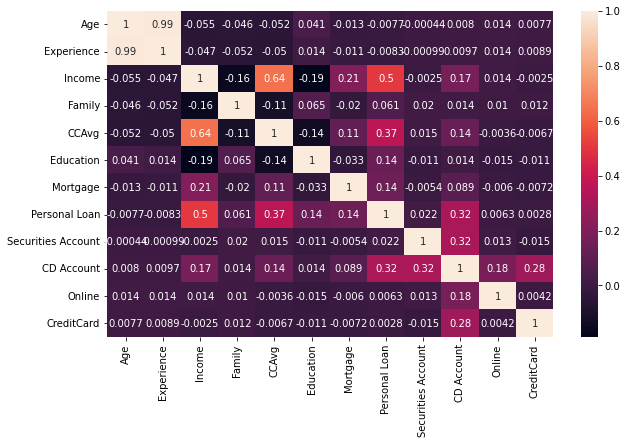

In [26]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True)

The insight from above heatmap: the Age & Experience have the same correlations with other features
- So we will drop one of them

In [27]:
df.drop(['Experience'], axis=1, inplace=True)

In [28]:
df.columns

Index(['Age', 'Income', 'Family', 'CCAvg', 'Education', 'Mortgage',
       'Personal Loan', 'Securities Account', 'CD Account', 'Online',
       'CreditCard'],
      dtype='object')

# **5. Analysis Data**

**5.1 Analysis Education status of customers**

In [29]:
df['Education'].unique()

array([1, 2, 3])

In [30]:
def mark(x):
  if x==1:
    return 'Undergraduate'
  elif x==2:
    return 'Graduate'
  else:
    return 'Advanced/Professional'

In [31]:
df['Education Mark'] = df['Education'].apply(mark)

In [32]:
df.head()

,Age,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard,Education Mark
0,25,49.0,4,1.6,1,0,0,1,0,0,0,Undergraduate
1,45,34.0,3,1.5,1,0,0,1,0,0,0,Undergraduate
2,39,11.0,1,1.0,1,0,0,0,0,0,0,Undergraduate
3,35,100.0,1,2.7,2,0,0,0,0,0,0,Graduate
4,35,45.0,4,1.0,2,0,0,0,0,0,1,Graduate


In [33]:
values = df.groupby(['Education Mark'])['Age'].count()
names = values.index

In [34]:
px.pie(df, names=names, values=values)

**5.2 Explore Acount Holder (customers have Securities Account or	CD Account (certificate deposite account))**

In [35]:
df.columns

Index(['Age', 'Income', 'Family', 'CCAvg', 'Education', 'Mortgage',
       'Personal Loan', 'Securities Account', 'CD Account', 'Online',
       'CreditCard', 'Education Mark'],
      dtype='object')

In [36]:
def holder_acc(row):
  if((row['Securities Account']==1) & (row['CD Account']==1)):
    return 'Holds Securities & Deposit'

  elif ((row['Securities Account']==1) & (row['CD Account']==0)):
    return 'Holds only Securities'

  elif ((row['Securities Account']==0) & (row['CD Account']==1)):
    return 'Holds only Deposit'

  else:
    return 'Not hold Securities & Deposit'

In [37]:
df['Account Holder Category'] = df.apply(holder_acc, axis=1)

In [38]:
df.head()

,Age,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard,Education Mark,Account Holder Category
0,25,49.0,4,1.6,1,0,0,1,0,0,0,Undergraduate,Holds only Securities
1,45,34.0,3,1.5,1,0,0,1,0,0,0,Undergraduate,Holds only Securities
2,39,11.0,1,1.0,1,0,0,0,0,0,0,Undergraduate,Not hold Securities & Deposit
3,35,100.0,1,2.7,2,0,0,0,0,0,0,Graduate,Not hold Securities & Deposit
4,35,45.0,4,1.0,2,0,0,0,0,0,1,Graduate,Not hold Securities & Deposit


In [39]:
values = df['Account Holder Category'].value_counts()
names = values.index
names

Index(['Not hold Securities & Deposit', 'Holds only Securities',
       'Holds only Deposit', 'Holds Securities & Deposit'],
      dtype='object')

In [40]:
px.pie(df, names=names, values=values)

**5.3 Analysis customer basic on Education, Income & personal loan**

In [41]:
df.columns

Index(['Age', 'Income', 'Family', 'CCAvg', 'Education', 'Mortgage',
       'Personal Loan', 'Securities Account', 'CD Account', 'Online',
       'CreditCard', 'Education Mark', 'Account Holder Category'],
      dtype='object')

In [42]:
px.box(df, x='Education Mark', y='Income', facet_col='Personal Loan')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).



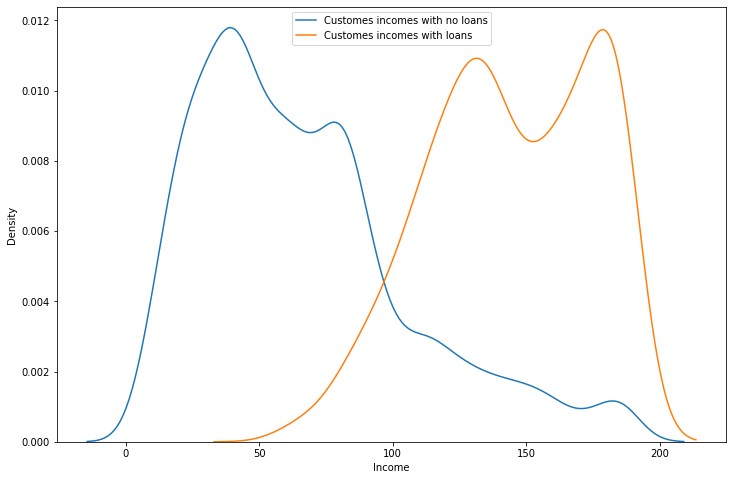

In [43]:
plt.figure(figsize=(12,8))
sns.distplot(df[df['Personal Loan']==0]['Income'], hist=False, label='Customes incomes with no loans')
sns.distplot(df[df['Personal Loan']==1]['Income'], hist=False, label='Customes incomes with loans')
plt.legend()

**5.4 Analysis customers on basics of Security Account, Online, Account Holder Category, & Credit Card**

In [44]:
df.columns

Index(['Age', 'Income', 'Family', 'CCAvg', 'Education', 'Mortgage',
       'Personal Loan', 'Securities Account', 'CD Account', 'Online',
       'CreditCard', 'Education Mark', 'Account Holder Category'],
      dtype='object')

In [45]:
col_names = ['Securities Account', 'Online', 'Account Holder Category', 'CreditCard']

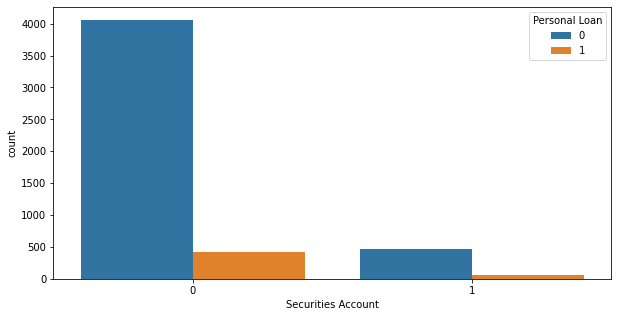

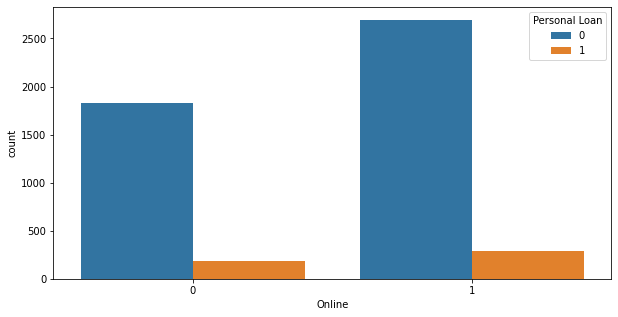

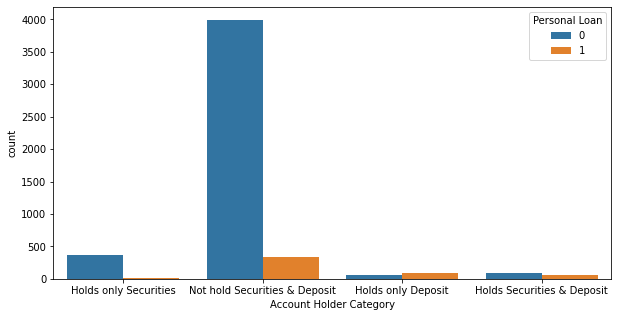

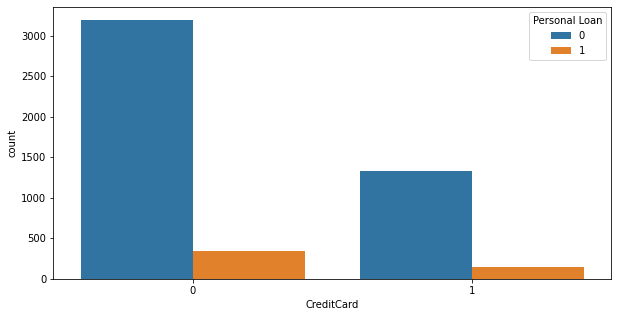

In [46]:
for col in col_names:
  plt.figure(figsize=(10,5))
  sns.countplot(x=col, hue='Personal Loan', data=df)

# **6. A/B Testing**
- test different ideas aganist each others in real world
- choose the one that statistcally performes better
- if p value less than significance level = .05, so we will reject defalut hypothesis(Ho) and accept alternative hypothesis(Ha) 
- else accept Ho and reject Ha

In [48]:
df.columns

Index(['Age', 'Income', 'Family', 'CCAvg', 'Education', 'Mortgage',
       'Personal Loan', 'Securities Account', 'CD Account', 'Online',
       'CreditCard', 'Education Mark', 'Account Holder Category'],
      dtype='object')

In [49]:
age_no_loan = df[df['Personal Loan']==0]['Age']
age_no_loan

0       25
1       45
2       39
3       35
4       35
        ..
4995    29
4996    30
4997    63
4998    65
4999    28
Name: Age, Length: 4520, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



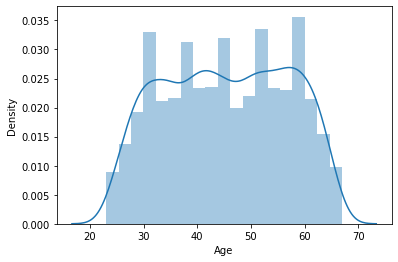

In [51]:
sns.distplot(age_no_loan)

In [50]:
age_yes_loan = df[df['Personal Loan']==1]['Age']
age_yes_loan

9       34
16      38
18      46
29      38
38      42
        ..
4883    38
4927    43
4941    28
4962    46
4980    29
Name: Age, Length: 480, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



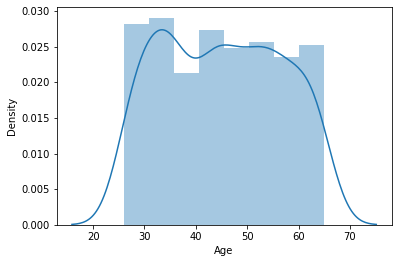

In [52]:
sns.distplot(age_yes_loan)

In [54]:
Ho = 'Age does not have impact on taking loan'
Ha = 'Age has impact on taking loan'

In [53]:
#The t-test quantifies the difference between the arithmetic means of the two samples.
t_stat, p_val= ss.ttest_ind(age_no_loan, age_yes_loan)
t_stat , p_val

(0.5461906615539323, 0.584959263705325)

In [56]:
if p_val < .05:
  print(Ha + ' because p_value = {} so less than .05(which is significance level)'.format(p_val))
else:
  print(Ho + ' because p_value = {} so greater than .05(which is significance level)'.format(p_val))

Age does not have impact on taking loan because p_value = 0.584959263705325 so greater than .05(which is significance level)


# Automate Analysis

In [58]:
def make_hypothes(col):
  no_loan = df[df['Personal Loan']==0][col]
  yes_loan = df[df['Personal Loan']==1][col]

  Ho = '{} does not have impact on taking loan'.format(col) #default hypothesis
  Ha = '{} has impact on taking loan'.format(col)           #alternative hypothesis

  t_stat, p_val= ss.ttest_ind(no_loan, yes_loan)
  t_stat , p_val
 
  if p_val < .05:
    print(Ha + ' because p_value = {} so less than .05(which is significance level)'.format(p_val))
  else:
    print(Ho + ' because p_value = {} so greater than .05(which is significance level)'.format(p_val))

In [59]:
#show if income has impact on taking loan or not
make_hypothes('Income')

Income has impact on taking loan because p_value = 0.0 so less than .05(which is significance level)


In [60]:
#show if family size has impact on taking loan or not
make_hypothes('Family')

Family has impact on taking loan because p_value = 1.4099040685673807e-05 so less than .05(which is significance level)
